In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, RocCurveDisplay

# 1. Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [2]:
print("First few rows:")
print(df.head())

First few rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  

In [3]:
# 2. Prepare data
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# 3. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [5]:
# 4. Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.988

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [6]:
# 5. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=data.target_names, columns=data.target_names)
print("\nConfusion Matrix:")
print(cm_df)


Confusion Matrix:
           malignant  benign
malignant         63       1
benign             1     106


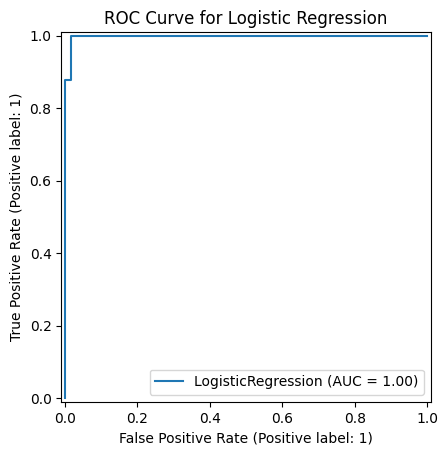

In [7]:
# 6. ROC(Received Operating Characteristics Curve) Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve for Logistic Regression")
plt.show()

In [8]:
# 7. Show top influencing features
coef_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nTop positive influence features:")
print(coef_df.head(5))

print("\nTop negative influence features:")
print(coef_df.tail(5))


Top positive influence features:
                    Feature  Coefficient
5          mean compactness     0.652655
15        compactness error     0.568702
11            texture error     0.367761
19  fractal dimension error     0.349557
18           symmetry error     0.324894

Top negative influence features:
                 Feature  Coefficient
13            area error    -0.937493
20          worst radius    -0.941060
23            worst area    -0.954956
27  worst concave points    -0.996807
21         worst texture    -1.226329
